# Decrete Transform

$$
F_k = \sum_{n=0}^{N-1} {x_n \cdot e^{ -j \omega n}}, \omega = \frac{2 \pi k}{N}
$$

In [1]:
from cmath import pi, exp

def discrete_ft(x, k):
    omega = 2 * pi * k / (N := len(x))

    return sum(x[n] * exp(-1j * omega * n) for n in range(N))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# O(n^2) complexity, better to just use FFT from scipy
def plot_frequency_spectrum(
                            samples, 
                            samples_per_second, 
                            min_frequency=0, 
                            max_frequency=None
                            ):
    num_bins = len(samples) // 2
    nyquist_frequency = samples_per_second // 2

    magnitudes = []
    for k in range(num_bins):
        magnitudes.append(abs(discrete_ft(samples, k)))
    
    # Normalise magnitudes
    magnitudes = [m / max(magnitudes) for m in magnitudes]

    # calculate frequency bins
    bin_resolution = samples_per_second / len(samples)
    frequency_bins = [k * bin_resolution for k in range(num_bins)]

    plt.xlim(min_frequency, max_frequency or nyquist_frequency)
    plt.bar(frequency_bins, magnitudes, width=bin_resolution)

## Sine Wave

In [3]:
import numpy as np

NUM_SAMPLES_PER_SECOND = 44100

def sine_wave(
            frequency, 
            phase=0, 
            amplitude=1, 
            seconds=5, 
            samples_per_second=NUM_SAMPLES_PER_SECOND
            ):
    t = np.linspace(0, seconds, seconds * samples_per_second)

    return amplitude * np.sin(2 * np.pi * frequency * t + phase)

In [4]:
tone = sine_wave(220) + sine_wave(440) + sine_wave(440.5)

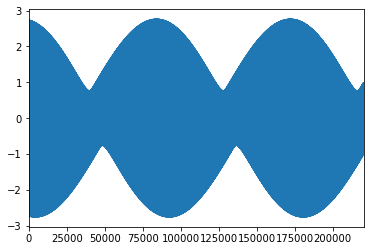

In [5]:
plt.xlim(0, NUM_SAMPLES_PER_SECOND * 5)
plt.plot(tone)

100% (8192 of 8192) |####################| Elapsed Time: 0:11:39 Time:  0:11:39


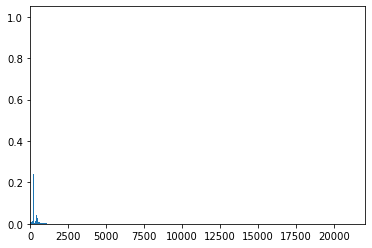

In [9]:
plot_frequency_spectrum(
                        tone[:1024], 
                        NUM_SAMPLES_PER_SECOND,
                        max_frequency=2000
                        )